# Advanced visual analytics - Compulsury task #

1. Question 1: Download data (Travel Data)Lenker til en ekstern side. : The data contains monthly passenger movement data between January 1990 and April 2004 in USA. Merge the data into one data source, plot simple graphs and compare the travel patterns between automobile, train and Air travel. Hint: Look at September 11 terrorist attack.
2. Question 2: Download data (WHO_Tuberculosis_data)Lenker til en ekstern side. : The data contains WHO data on Tuberculosis across the world. Merge the data (before and after year 2000) and convert it into a tidy data format. Shortly report your findings on Afghanistan, Norway and India.
3. Question 3: Download data (Weather Data)Lenker til en ekstern side. : The data contains temperature measured on certain days of the month. Convert the data into a tidy data format, plot simple graphs and discuss monthly patterns. Make suitable assumptions.

imports

In [53]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('bright')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

## Question 1: travel data ##

Definitions:
- Air RPM; actual airline revenue passenger miles (Air), 
- Rail PM; rail passenger miles (Rail), and 
- VMT; vehicle miles traveled (Auto).

Load data:

In [54]:
# Set directory
os.chdir(r"C:\Users\tgsog\OneDrive\Desktop\Visual Analytics\Class exercise 28.10.2024 due")

# Paths to the files
path_AirTravel_USA ="C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 1\\AirTravel_USA.csv"
path_Auto_vehicle_miles_traveled_USA = "C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 1\\Auto_vehicle_miles_traveled_USA.csv"
path_TrainTravel_USA = "C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 1\\TrainTravel_USA.csv"

# Read the CSV files
df_air = pd.read_csv(path_AirTravel_USA, sep = ";")
df_auto = pd.read_csv(path_Auto_vehicle_miles_traveled_USA)
df_train = pd.read_csv(path_TrainTravel_USA)

In [55]:
df_train

,Month,Year,Rail PM
0,1,1990,454115779
1,2,1990,435086002
2,3,1990,568289732
3,4,1990,568101697
4,5,1990,539628385
...,...,...,...
167,12,2003,489403554
168,1,2004,410338691
169,2,2004,389778365
170,3,2004,453014590


## Steps to clean data: ##

1. Converting all values to complete numbers

In [56]:
#Converting all miles to the same level
df_auto["auto_miles"]=df_auto["VMT (billions)"]*1000000000 #in billions, one billion has 6 0s
df_air["air_miles"] = df_air["Air RPM (000s)"]*1000 #in thousands = 1000
df_train["rail_miles"] = df_train["Rail PM"] #no additional mile difference

2. Create a new dataframe for the differen modes of transportation

In [57]:
df = pd.DataFrame({"Month":df_auto.Month,
                   "auto_miles":df_auto["auto_miles"],
                   "air_miles":df_air["air_miles"],
                   "rail_miles":df_train["rail_miles"],
                   "Year":df_air.Year
                  })

3. Set to datetimeformat

In [58]:
auto_date = pd.to_datetime(df_auto.Month, format = '%b-%y')
df_auto["month"]=auto_date.dt.month
df_auto["year"] = auto_date.dt.year

4. Checking that the dataset dates are the same

In [59]:
#auto months - train months = 0 = no distortion
sum(abs(df_auto.month-df_train.Month))

0

In [60]:
#auto month- train month = 0 = no distortion
sum(abs(df_auto.month - df_train.Month))

0

In [61]:
sum(abs(df_auto.year -df_train.Year))

0

nas

### Writing data to travel.csv ###

In [62]:
df.to_csv("C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 1\\output data after cleaning\\travel.csv", index=False)

## Comments on the data ##

- The year 2004 only has the four first months. Therefore, any sum aggregation of a year will be wrong since it is not adjusted for the number of months, such as an average aggregation.
- In time series data, some components are interesting to view
  1. The trendline x
  2. Cyclicality
  3. seasonality  (average of each month)
  4. Base mean level for the series x
  5. noise - not explained by seasonality and cycles
  6. Events - interventions or shocks (find some test)
  7. autocorrelationm  (below x)
  8. growth rate (growth from month to month, year to year, and the compounded annual growth rate)
  9. volatility or (heteroscedasticity) (x)
- 

In [63]:
df['growth_auto'] = df.auto_miles.pct_change() * 100
df['growth_air'] = df.air_miles.pct_change() * 100
df['growth_rail'] = df.rail_miles.pct_change() * 100

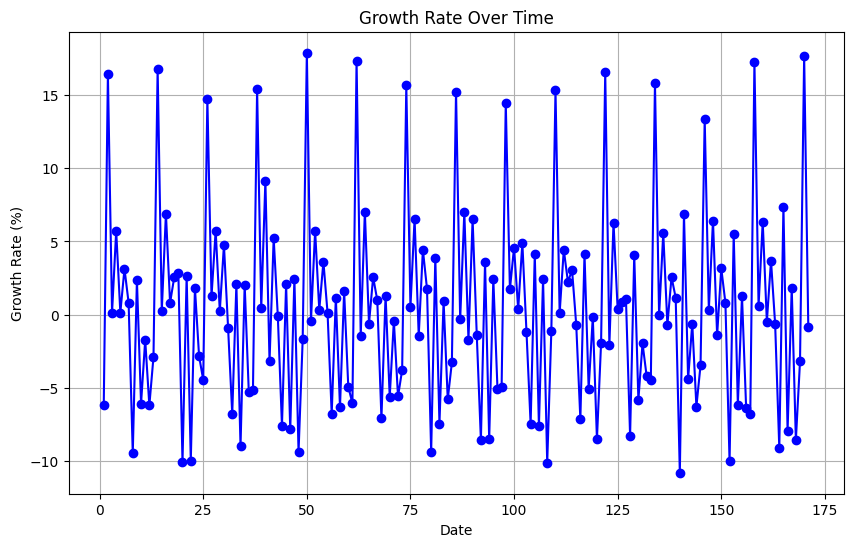

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.growth_auto, marker='o', linestyle='-', color='b')

plt.title('Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

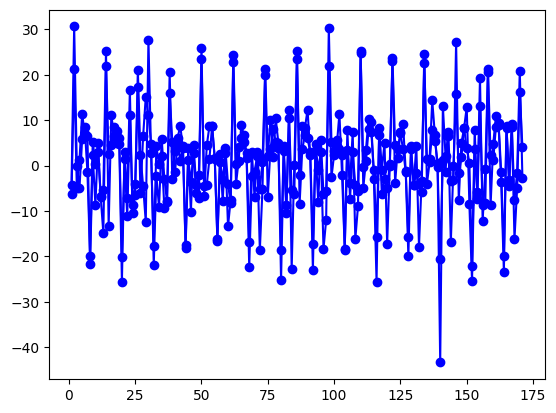

In [65]:
plt.plot(df.index, df.growth_air, marker='o', linestyle='-', color='b')
plt.plot(df.index, df.growth_rail, marker='o', linestyle='-', color='b')

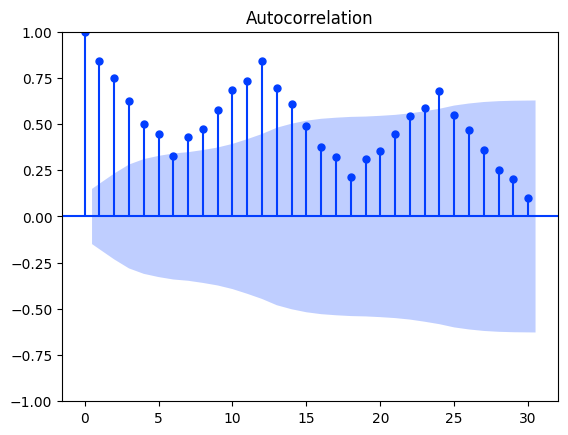

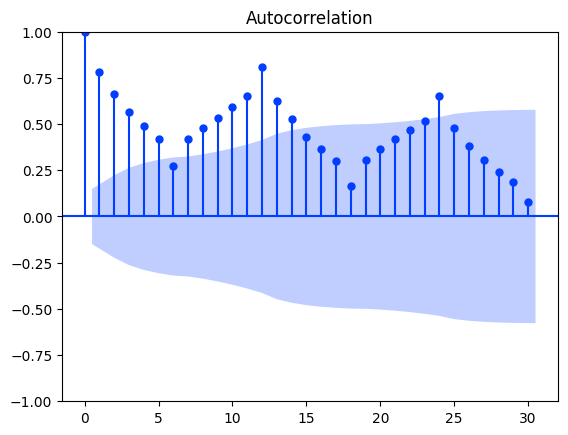

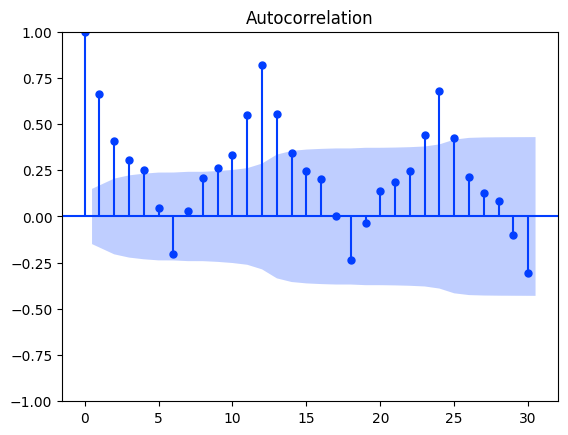

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.auto_miles, lags=30)  # lags=30 means we look at up to 30 time lags
plot_acf(df.air_miles, lags=30)
plot_acf(df.rail_miles, lags=30)
plt.show()

## Question 2: Health data ##

Loading data:

In [67]:
path_master="C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 2\\Country_Master_Data.csv"
path_a2k="C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 2\\Data_after_2000.csv"
path_b2k="C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 2\\Data_before_2000.csv"
path_def ="C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 2\\Defintions variables.csv"
df_mast = pd.read_csv(path_master)
df_a2k=pd.read_csv(path_a2k)
df_b2k=pd.read_csv(path_b2k,low_memory = False)
df_def=pd.read_csv(path_def) #the definitions are only needed to understand the diseases but not to merge/join the tables.

In [68]:
print(df_b2k.head(3),
df_a2k.head(3),
df_mast.head(3),
df_def.head(3))

  iso2 iso3    year  new_sp_m014  new_sp_m1524  new_sp_m2534  new_sp_m3544  \
0   AF  AFG  1980.0          NaN           NaN           NaN           NaN   
1   AF  AFG  1981.0          NaN           NaN           NaN           NaN   
2   AF  AFG  1982.0          NaN           NaN           NaN           NaN   

   new_sp_m4554  new_sp_m5564  new_sp_m65  ...  newrel_m4554  newrel_m5564  \
0           NaN           NaN         NaN  ...           NaN           NaN   
1           NaN           NaN         NaN  ...           NaN           NaN   
2           NaN           NaN         NaN  ...           NaN           NaN   

   newrel_m65  newrel_f014  newrel_f1524  newrel_f2534  newrel_f3544  \
0         NaN          NaN           NaN           NaN           NaN   
1         NaN          NaN           NaN           NaN           NaN   
2         NaN          NaN           NaN           NaN           NaN   

   newrel_f4554  newrel_f5564  newrel_f65  
0           NaN           NaN         NaN

## Steps to clean data ##

Steps to create and merge table: 
Order of opperations - filter out all values not needed as fast as possible
1. Inspect datatypes
2. Fill or remove NA or 0
3. inspect unique values
4. melt data
5. Separating disease from, genderAge
6. Separating gender and age
7. drop columns
8. Add binary for before and after
9. Union the before and after
10. join on master file
11. creating categorical for age groups (25-35 > 0-14)

1. Inspecting datatypes

In [69]:
df_a2k.dtypes.head(5) #datatypes are ok

iso2             object
iso3             object
year              int64
new_sp_m014     float64
new_sp_m1524    float64
dtype: object

In [70]:
df_b2k.dtypes.head(5) # year is a float not an integer

iso2             object
iso3             object
year            float64
new_sp_m014     float64
new_sp_m1524    float64
dtype: object

2: filling na, and removing year values with NA or 0

In [71]:
#replacing and filling in year values
df_a2k.year=df_a2k.year.replace("nan",0)
df_a2k.year = df_a2k.year.fillna(0)

df_b2k.year =df_b2k.year.replace("nan",0)
df_b2k.year =df_b2k.year.fillna(0)

In [72]:
#Displaying all the different unique values, to see if there are any na values
print(df_a2k.year.unique(),df_b2k.year.unique()) #
print("There are no na in years values")

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013] [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000.    0.]
There are no na in years values


Removing rows with 0 as year

In [73]:
df_a2k = df_a2k[df_a2k.year !=0]
df_b2k = df_b2k[df_b2k.year !=0]
print("All rows with year = 0 are sliced away")

All rows with year = 0 are sliced away


In [74]:
df_a2k.year =df_a2k.year.astype(int) 
df_b2k.year =df_b2k.year.astype(int) 
print(df_a2k.year.dtypes, df_b2k.year.dtypes)
print("year dtypes are both int32")

int32 int32
year dtypes are both int32


3. Inspect all unique values

In [75]:
a2k_unique ={}
for x in df_a2k.columns:
    a2k_unique.update({x:df_a2k[x].unique()})
b2k_unique ={}
for x in df_b2k.columns:
    b2k_unique.update({x:df_b2k[x].unique()})

4. melting into tidy format

In [76]:
a2k = pd.melt(df_a2k, id_vars=["iso2","iso3","year"], value_vars=df_a2k.columns[3:], var_name="disease", value_name="value")
b2k = pd.melt(df_b2k, id_vars=["iso2","iso3","year"], value_vars=df_b2k.columns[3:], var_name="disease", value_name="value")

5. Separating columns based on rightmost "_":

In [77]:
a2k[['disease_type', 'gender_age']] = a2k['disease'].str.rsplit('_', n=1, expand=True)
b2k[['disease_type', 'gender_age']] = b2k['disease'].str.rsplit('_', n=1, expand=True)

6. Separating gender_age on the first letter

In [78]:
#Separating on a2k:
a2k["gender"] = a2k.gender_age.str[0]
a2k["age"] = a2k.gender_age.str[1:]
ak2_age = []
for x in a2k["age"]:
    if len(x) == 3:
        y =x[0] + "-"+x[1:]
        ak2_age.append(y)
    elif len(x) == 4:
        y = x[0:2] + "-"+x[2:]
        ak2_age.append(y)
    else:
        ak2_age.append(x)
a2k["age"] = ak2_age

In [79]:
#Separating on b2k:
b2k["gender"] = b2k.gender_age.str[0]
b2k["age"] = b2k.gender_age.str[1:]
bk2_age = []
for x in b2k["age"]:
    if len(x) == 3:
        y =x[0] + "-"+x[1:]
        bk2_age.append(y)
    elif len(x) == 4:
        y = x[0:2] + "-"+x[2:]
        bk2_age.append(y)
    else:
        bk2_age.append(x)
b2k["age"] = bk2_age

7. Dropping columns

In [80]:
a2k =a2k.drop(columns=["gender_age","disease"])
b2k =b2k.drop(columns=["gender_age","disease"])

8. Adding after column for the two dataframes

In [81]:
a2k["after"] = [1 for x in range(len(a2k))]
b2k["after"] =[0 for x in range(len(b2k))]

9. appending on the two values

In [82]:
df_ab =pd.concat([a2k,b2k])
df_ab= df_ab.dropna(subset=["value","iso2","iso3"])

10. Joining df_ab and master on iso2

In [83]:
df_abm = pd.merge(df_ab,df_mast, on ="iso2", how = "left").reset_index().drop(columns = ["index","iso2","iso3_x","iso3_y"])

11. Creating categorical for age groups

In [84]:
cat_list = [x for x in df_abm.age.unique()][::-1]
df_abm["age"]=pd.Categorical(df_abm["age"],categories = cat_list, ordered = True)

In [85]:
df_abm

,year,value,disease_type,gender,age,after,country
0,2000,52.0,new_sp,m,0-14,1,Afghanistan
1,2001,129.0,new_sp,m,0-14,1,Afghanistan
2,2002,90.0,new_sp,m,0-14,1,Afghanistan
3,2003,127.0,new_sp,m,0-14,1,Afghanistan
4,2004,139.0,new_sp,m,0-14,1,Afghanistan
...,...,...,...,...,...,...,...
78808,2000,4.0,new_ep,f,55-64,0,Switzerland
78809,1999,25.0,new_ep,f,65,0,Israel
78810,1999,16.0,new_ep,f,65,0,Switzerland
78811,2000,26.0,new_ep,f,65,0,Israel


12. There are some diseases that are not used after certain ages:
- new_sp_m014: Not used after 2012
- new_sp_m1524 Not used after 2012
- new_sn_m014: not used after 2012
- newrel_f014: New and relapse cases (bu only new cases if rel_in_agesex_flg = 0): females aged 0-14 years
- new_ep_f014: New extrepulmonary cases - Not used after 2012

Then in the question we are to filter graph for Afganistan, Norway and India
- Filter out countries

12. a) filtered out for after 2012

In [86]:
df_abm = df_abm[~(
    ((df_abm['disease_type'] == "new_sp") & (df_abm['gender'] == "m") & (df_abm['age'] == "0-14") & (df_abm['year'] <= 2012)) |
    ((df_abm['disease_type'] == "new_sp") & (df_abm['gender'] == "m") & (df_abm['age'] == "15-24") & (df_abm['year'] <= 2012)) |
    ((df_abm['disease_type'] == "new_sn") & (df_abm['gender'] == "m") & (df_abm['age'] == "0-14") & (df_abm['year'] <= 2012)) |
    ((df_abm['disease_type'] == "new_ep") & (df_abm['gender'] == "f") & (df_abm['age'] == "0-14") & (df_abm['year'] <= 2012)
))]

12. b) filtered out for Afghanistan, Norway and India

In [87]:
df_nai = df_abm[(df_abm.country =="Afghanistan") |(df_abm.country =="Norway") |(df_abm.country =="India")]

### Write data to disease.csv ###

In [88]:
df_nai.to_csv("C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 2\\outputfile\\diseases_nai.csv", index=False)

# Question 3: Weather data #

Load data:

In [89]:
path_weather = "C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 3\\weather.csv"
df_weather = pd.read_csv(path_weather)

In [90]:
df_w = pd.melt(df_weather, 
        id_vars = ["Country","year","month","element"],
        value_vars= df_weather[df_weather.columns[4:]],
        var_name = "day",
        value_name = "temperature")

## Steps to cleaning data:

1. Take away the d from day

In [91]:
df_w.day = df_w.day.str[1:]

2. Separate into t_max and t_min

In [92]:
t_max =df_w[df_w.element == "tmax"]
t_min = df_w[df_w.element == "tmin"]

2. Interpolate forwards and then fill backwards:

In [93]:
t_max.loc[:,'temperature'] = t_max['temperature'].interpolate(method='linear').bfill()
t_min.loc[:,'temperature'] = t_min['temperature'].interpolate(method='linear').bfill()

In [94]:
t_max.isna().sum() # check that ther are no NA values

Country        0
year           0
month          0
element        0
day            0
temperature    0
dtype: int64

3. Set date components to integers

In [95]:
t_min.loc[:,"day"] =t_min.loc[:,"day"].str.replace("d","")
t_min.loc[:,"day"] = t_min.loc[:,"day"].astype("int")
t_min.loc[:,"month"] = t_min.loc[:,"month"].astype("int")
t_min.loc[:,"year"] = t_min.loc[:,"year"].astype("int")

In [96]:
t_max.loc[:,"day"] =t_max.loc[:,"day"].str.replace("d","")
t_max.loc[:,"day"] = t_max.loc[:,"day"].astype("int")
t_max.loc[:,"month"] = t_max.loc[:,"month"].astype("int")
t_max.loc[:,"year"] = t_max.loc[:,"year"].astype("int")

4. There are too many days in each month - filter for days that do not exist in the months

number of days in each month:
- January: 31 days
- February: 28 days (29 days in a leap year)
- March: 31 days
- April: 30 days
- May: 31 days
- June: 30 days
- July: 31 days
- August: 31 days
- September: 30 days
- October: 31 days
- November: 30 days
- December: 31 days

In [97]:
#general datetime
month = pd.Series([x for x in range(1,13,1)])
month_days_max =pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
datadf = pd.DataFrame()
datadf["month"] =month
datadf["month_days_max"] = month_days_max

In [98]:
t_min = pd.merge(t_min,datadf, how="left",on ="month")
t_min = t_min[t_min["day"] <= t_min["month_days_max"]]

In [99]:
t_max =pd.merge(t_max,datadf, how="left",on ="month")
t_max = t_max[t_max["day"] <= t_max["month_days_max"]]

In [100]:
t_max["date"] = pd.to_datetime(t_max[["day","month","year"]])
t_max =t_max.sort_values(by = ["date"])

In [101]:
t_min["date"] = pd.to_datetime(t_min.loc[:,["day","month","year"]])
t_min =t_min.sort_values(by = ["date"])
#does not work  -datetime
t_max["date"] = pd.to_datetime(t_max.loc[:,["day","month","year"]])
t_max =t_max.sort_values(by = ["date"])

5. Rename columns and create a dataframe and input the max temperature

In [102]:
t_min.columns = ['Country', 'year', 'month', 'element', 'day', 't_min',
       'month_days_max', 'date']
t_max.columns = ['Country', 'year', 'month', 'element', 'day', 't_max',
       'month_days_max', 'date']
df_t = t_min.drop(columns = ["element", "month_days_max"])
df_t["t_max"] = t_max.t_max
df_t = df_t.loc[:,["Country","year","month","day","date","t_min","t_max"]]

In [103]:
df_t

,Country,year,month,day,date,t_min,t_max
0,India,2015,1,1,2015-01-01,13.800000,29.900000
11,India,2015,1,2,2015-01-02,14.100000,28.600000
22,India,2015,1,3,2015-01-03,15.033333,26.500000
33,India,2015,1,4,2015-01-04,15.535714,28.100000
44,India,2015,1,5,2015-01-05,13.100000,29.650000
...,...,...,...,...,...,...,...
296,India,2015,12,27,2015-12-27,14.280000,28.050000
307,India,2015,12,28,2015-12-28,15.750000,30.925000
318,India,2015,12,29,2015-12-29,14.700000,27.850000
329,India,2015,12,30,2015-12-30,15.000000,26.466667


write data into two dataframes  - t_max.csv and t_min.csv

In [104]:
t_max.to_csv("C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 3\\outputfile\\t_max.csv", index=False)
t_min.to_csv("C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 3\\outputfile\\t_min.csv", index=False)
df_t.to_csv("C:\\Users\\tgsog\\OneDrive\\Desktop\\Visual Analytics\\Class exercise 28.10.2024 due\\Task 3\\outputfile\\temp_df.csv", index=False)